In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

pd.options.display.max_columns = None

## Hall of Fame List

In [2]:
hof_data = pd.read_csv('data/HOF_data.csv')

In [3]:
def qb_and_rb(pos):
    if pos == 'QB':
        return pos
    else:
        return np.nan

In [4]:
hof_data['Pos'] = hof_data['Pos'].apply(lambda x: qb_and_rb(x))
hof_data.drop('Lng.2', axis=1, inplace=True)
hof_data.drop('Lng.1', axis=1, inplace=True)
hof_data.drop('TD.2', axis=1, inplace=True)
hof_data.drop('Yds.3', axis=1, inplace=True)
hof_data.drop('Yds.1', axis=1, inplace=True)
hof_data.drop('Rec', axis=1, inplace=True)
hof_data.drop('CarAV', axis=1, inplace=True)
hof_data.drop('St', axis=1, inplace=True)
hof_data.drop('Lng', axis=1, inplace=True)

In [5]:
hof_data.dropna(inplace=True)
hof_data.reset_index(inplace=True)
hof_data.drop('index', axis=1, inplace=True)

In [6]:
hof_data.rename(columns={'AP1': 'First_Team_AP', 'G': 'Num_Games', 'PB': 'Pro_Bowl', 'Cmp': 'Pass_Cmp', 'Att': 'Pass_Att', 'Yds': 'Pass_Yds'}, inplace=True)
hof_data.rename(columns={'TD': 'Pass_TD', 'Int': 'Interceptions', 'Sk': 'Times_Sacked', 'Att.1': 'Rushing_Att', 'Yds.2': 'Rushing_Yds', 'TD.1': 'Rushing_Tds',}, inplace=True)

In [7]:
hof_data

,Rk,Player,Pos,Indct,From,To,First_Team_AP,Pro_Bowl,Num_Games,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Interceptions,Times_Sacked,Rushing_Att,Rushing_Yds,Rushing_Tds
0,19,Kurt Warner\WarnKu00,QB,2017,1998,2009,2,4,124,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0
1,20,Brett Favre\FavrBr00,QB,2016,1991,2010,3,11,302,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0
2,24,Ken Stabler\StabKe00,QB,2016,1970,1984,1,4,184,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0
3,81,Troy Aikman\AikmTr00,QB,2006,1989,2000,0,6,165,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0
4,83,Warren Moon\MoonWa00,QB,2006,1984,2000,0,9,208,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0
5,87,Dan Marino\MariDa00,QB,2005,1983,1999,3,9,242,4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0
6,89,Steve Young\YounSt00,QB,2005,1985,1999,3,7,169,2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0
7,92,John Elway\ElwaJo00,QB,2004,1983,1998,0,9,234,4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0
8,100,Jim Kelly\KellJi00,QB,2002,1986,1996,1,5,160,2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0
9,110,Joe Montana\MontJo01,QB,2000,1979,1994,3,8,192,3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0


## Basic Stats and Player ID Look Up for Other Tables

In [8]:
basic_stats = pd.read_csv('data/Basic_Stats.csv')

In [9]:
retired = basic_stats[basic_stats["Current Status"] == "Active"].copy()
retired

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN
7,22.0,"Navarre , FL",1/31/1995,Clemson,Active,New York Jets,Rookie,77.0,Navarre HS,FL,"Leggett, Jordan",NaN,jordanleggett/2557885,TE,250.0,NaN
17,25.0,NaN,3/11/1992,Pittsburgh,Active,Washington Redskins,1st season,74.0,NaN,NaN,"Garner, Manasseh",NaN,manassehgarner/2553801,TE,220.0,NaN
35,29.0,"Dayton , OH",4/1/1988,Ohio State,Active,Carolina Panthers,8th season,71.0,Northmont HS,"Clayton, OH","Coleman, Kurt",20.0,kurtcoleman/494261,SS,200.0,NaN
37,26.0,"Rodeo , CA",7/28/1990,Ohio U.,Active,Oakland Raiders,4th season,72.0,De La Salle HS,"Concord, CA","Carrie, T.J.",38.0,t.j.carrie/2550164,SS,205.0,NaN
39,29.0,"Fort Myers , FL",11/30/1987,South Florida,Active,Miami Dolphins,8th season,72.0,Cape Coral HS,FL,"Allen, Nate",NaN,nateallen/2508043,DB,210.0,NaN
45,24.0,NaN,5/5/1993,Akron,Active,Washington Redskins,1st season,75.0,NaN,NaN,"Williams, Isaiah",63.0,isaiahwilliams/2557450,OT,295.0,NaN
52,24.0,"Kansas City , MO",1/15/1993,Pittsburg State,Active,Kansas City Chiefs,2nd season,74.0,Hogan Preparatory Academy HS,"Kansas City, MO","Bausby, DeVante",NaN,devantebausby/2553790,CB,190.0,NaN
54,NaN,NaN,NaN,Massachusetts,Active,Denver Broncos,Rookie,76.0,NaN,NaN,"Wilkinson, Elijah",NaN,elijahwilkinson/2559295,OT,331.0,NaN
63,27.0,"Stockton , CA",1/1/1990,Montana,Active,Los Angeles Rams,6th season,74.0,Edison HS,"Stockton, CA","Johnson, Trumaine",22.0,trumainejohnson/2532877,CB,208.0,NaN


In [10]:
basic_stats = pd.read_csv('data/Basic_Stats.csv')
basic_stats.drop('Position', axis=1, inplace=True)
basic_stats.drop('Number', axis=1, inplace=True)
basic_stats.drop('Current Team', axis=1, inplace=True)
basic_stats.drop('High School', axis=1, inplace=True)
basic_stats.drop('Years Played', axis=1, inplace=True)
basic_stats.drop('Age', axis=1, inplace=True)
basic_stats.drop('High School Location', axis=1, inplace=True)
basic_stats.dropna(inplace=True)
basic_stats.reset_index(inplace=True)
basic_stats.drop('index', axis=1, inplace=True)
basic_stats.rename(columns={'Player Id': 'Player_Id'}, inplace=True)
basic_stats.head()

,Birth Place,Birthday,College,Current Status,Experience,Height (inches),Name,Player_Id,Weight (lbs)
0,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,3 Seasons,71.0,"Evans, Fred",fredevans/2513736,185.0
1,"Dayton , OH",12/21/1930,Dayton,Retired,1 Season,70.0,"Raiff, Jim",jimraiff/2523700,235.0
2,"Temple , TX",9/11/1960,Louisiana Tech,Retired,1 Season,74.0,"Fowler, Bobby",bobbyfowler/2514295,230.0
3,"New Orleans , LA",9/30/1986,LSU,Retired,5 Seasons,73.0,"Johnson, Quinn",quinnjohnson/79593,255.0
4,"Detroit , MI",3/31/1992,Central Michigan,Active,3rd season,77.0,"Walton, L.T.",l.t.walton/2552444,305.0


In [11]:
retired = basic_stats[basic_stats["Current Status"] == "Active"].copy()
retired

,Birth Place,Birthday,College,Current Status,Experience,Height (inches),Name,Player_Id,Weight (lbs)
4,"Detroit , MI",3/31/1992,Central Michigan,Active,3rd season,77.0,"Walton, L.T.",l.t.walton/2552444,305.0
7,"Navarre , FL",1/31/1995,Clemson,Active,Rookie,77.0,"Leggett, Jordan",jordanleggett/2557885,250.0
29,"Dayton , OH",4/1/1988,Ohio State,Active,8th season,71.0,"Coleman, Kurt",kurtcoleman/494261,200.0
31,"Rodeo , CA",7/28/1990,Ohio U.,Active,4th season,72.0,"Carrie, T.J.",t.j.carrie/2550164,205.0
33,"Fort Myers , FL",11/30/1987,South Florida,Active,8th season,72.0,"Allen, Nate",nateallen/2508043,210.0
45,"Kansas City , MO",1/15/1993,Pittsburg State,Active,2nd season,74.0,"Bausby, DeVante",devantebausby/2553790,190.0
53,"Stockton , CA",1/1/1990,Montana,Active,6th season,74.0,"Johnson, Trumaine",trumainejohnson/2532877,208.0
54,"Casper , WY",11/19/1986,Utah,Active,8th season,76.0,"Beadles, Zane",zanebeadles/496980,305.0
55,"Orland Park , IL",5/29/1994,Indiana,Active,Rookie,76.0,"Feeney, Dan",danfeeney/2557873,304.0
59,"San Diego , CA",1/19/1990,USC,Active,3rd season,75.0,"Holmes, Khaled",khaledholmes/2539307,309.0


## Linking Player ID From Stats Tables to HOF Table

In [12]:
player_ids = []
not_in = []
not_in_index = []
i = 0
for item in hof_data['Player']:
    name = item.split('\\')[0]
    name = name.split(' ')
    name = name[1] + ', ' + name[0]
    found = basic_stats[basic_stats['Name'].str.contains(name)]
    if name == 'Young, Steve':
        player_ids.append(found.Player_Id.to_string().split(' ')[8])
    elif name == 'Kelly, Jim':
        player_ids.append(found.Player_Id.to_string().split(' ')[10])
    else:
        check = found.Player_Id.to_string().split(' ')
        if len(check) < 5:
            print(name)
            print(i)
            not_in.append(name)
            not_in_index.append(i)
        else:
            player_ids.append(found.Player_Id.to_string().split(' ')[4])
    
    i = i + 1

Stabler, Ken
2
Moon, Warren
4
Montana, Joe
9
Griese, Bob
11
Bradshaw, Terry
12
Staubach, Roger
16
Jurgensen, Sonny
17
Blanda, George
18
Starr, Bart
20


In [13]:
hof_data_with_id = hof_data.drop(2, axis=0)
hof_data_with_id.drop(4, axis=0, inplace=True)
hof_data_with_id.drop(9, axis=0, inplace=True)
hof_data_with_id.drop(11, axis=0, inplace=True)
hof_data_with_id.drop(12, axis=0, inplace=True)
hof_data_with_id.drop(16, axis=0, inplace=True)
hof_data_with_id.drop(17, axis=0, inplace=True)
hof_data_with_id.drop(18, axis=0, inplace=True)
hof_data_with_id.drop(20, axis=0, inplace=True)
hof_data_with_id.reset_index(inplace=True)
hof_data_with_id.drop('index', axis=1, inplace=True)
hof_data_with_id['Player_Id'] = player_ids

In [14]:
hof_data_with_id

,Rk,Player,Pos,Indct,From,To,First_Team_AP,Pro_Bowl,Num_Games,Pass_Cmp,Pass_Att,Pass_Yds,Pass_TD,Interceptions,Times_Sacked,Rushing_Att,Rushing_Yds,Rushing_Tds,Player_Id
0,19,Kurt Warner\WarnKu00,QB,2017,1998,2009,2,4,124,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,kurtwarner/2503540
1,20,Brett Favre\FavrBr00,QB,2016,1991,2010,3,11,302,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,brettfavre/2500606
2,81,Troy Aikman\AikmTr00,QB,2006,1989,2000,0,6,165,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,troyaikman/2499369
3,87,Dan Marino\MariDa00,QB,2005,1983,1999,3,9,242,4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,danmarino/2501869
4,89,Steve Young\YounSt00,QB,2005,1985,1999,3,7,169,2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,steveyoung/2503843
5,92,John Elway\ElwaJo00,QB,2004,1983,1998,0,9,234,4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,johnelway/2500547
6,100,Jim Kelly\KellJi00,QB,2002,1986,1996,1,5,160,2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,
7,137,Dan Fouts\FoutDa00,QB,1993,1973,1987,2,6,181,3297.0,5604.0,43040.0,254.0,242.0,319.0,224.0,476.0,13.0,danfouts/2514293
8,162,Len Dawson\DawsLe00,QB,1987,1957,1975,2,7,211,2136.0,3741.0,28711.0,239.0,183.0,167.0,294.0,1293.0,9.0,lendawson/2512662
9,171,Fran Tarkenton\TarkFr00,QB,1986,1961,1978,1,9,246,3686.0,6467.0,47003.0,342.0,266.0,274.0,675.0,3674.0,32.0,frantarkenton/2527019


## All Quarterback Stats

In [15]:
qb = pd.read_csv('data/Game_Logs_Quarterback.csv')

In [16]:
# win marked by 1 loss is 0
# home marked by 1 away marked by 0

In [17]:
qb.drop('Position', axis=1, inplace=True)
qb.drop('Game Date', axis=1, inplace=True)
qb.drop('Games Played', axis=1, inplace=True)
qb.drop('Games Started', axis=1, inplace=True)
qb['Season'] = qb['Season'].apply(lambda x: np.nan if x == 'Preseason' else x)
qb['Home or Away'] = qb['Home or Away'].apply(lambda x: 0 if x == 'Away' else 1)
qb.rename(columns={'Home or Away': 'Home'}, inplace=True)
qb = qb.replace('--',0)
qb.dropna(inplace=True)
qb.drop('Season', axis=1, inplace=True)
qb['Outcome'] = qb['Outcome'].apply(lambda x: 0 if x == 'L' else 1)
qb.reset_index(inplace=True)
qb.drop('index', axis=1, inplace=True)
qb

,Player Id,Name,Year,Week,Home,Opponent,Outcome,Score,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
0,billdemory/2512778,"Demory, Bill",1974,1,0,KC,0,16 to 24,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
1,billdemory/2512778,"Demory, Bill",1974,2,0,CHI,1,23 to 21,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
2,billdemory/2512778,"Demory, Bill",1974,3,0,BUF,0,12 to 16,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
3,billdemory/2512778,"Demory, Bill",1974,4,0,MIA,0,17 to 21,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
4,billdemory/2512778,"Demory, Bill",1974,5,1,NE,0,0 to 24,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
5,billdemory/2512778,"Demory, Bill",1974,6,1,BAL,0,20 to 35,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
6,billdemory/2512778,"Demory, Bill",1974,7,1,LA,0,13 to 20,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
7,billdemory/2512778,"Demory, Bill",1974,8,1,HOU,0,22 to 27,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
8,billdemory/2512778,"Demory, Bill",1974,9,0,NYG,1,26 to 20,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0
9,billdemory/2512778,"Demory, Bill",1974,10,0,NE,1,21 to 16,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0


In [18]:
retired = qb[qb["Name"] == "Brady, Tom"].copy()
retired

,Player Id,Name,Year,Week,Home,Opponent,Outcome,Score,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Passer Rating,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost
9539,tombrady/2504211,"Brady, Tom",2016,5,0,CLE,1,33 to 13,28,40,70.0,406,10.2,3,0,1,3,127.7,2,14,7.0,0,0,0
9540,tombrady/2504211,"Brady, Tom",2016,6,1,CIN,1,35 to 17,29,35,82.9,376,10.7,3,0,3,18,140.0,2,2,1.0,0,0,0
9541,tombrady/2504211,"Brady, Tom",2016,7,0,PIT,1,27 to 16,19,26,73.1,222,8.5,2,0,0,0,124.2,5,13,2.6,0,0,0
9542,tombrady/2504211,"Brady, Tom",2016,8,0,BUF,1,41 to 25,22,33,66.7,315,9.5,4,0,4,22,137.0,1,15,15.0,0,0,0
9543,tombrady/2504211,"Brady, Tom",2016,10,1,SEA,0,24 to 31,23,32,71.9,316,9.9,0,1,2,12,90.1,5,7,1.4,0,1,0
9544,tombrady/2504211,"Brady, Tom",2016,11,0,SF,1,30 to 17,24,40,60.0,280,7.0,4,0,1,7,114.6,4,12,3.0,0,0,0
9545,tombrady/2504211,"Brady, Tom",2016,12,0,NYJ,1,22 to 17,30,50,60.0,286,5.7,2,0,0,0,89.2,3,-4,-1.3,0,1,0
9546,tombrady/2504211,"Brady, Tom",2016,13,1,LA,1,26 to 10,33,46,71.7,269,5.8,1,0,0,0,93.5,3,1,0.3,0,0,0
9547,tombrady/2504211,"Brady, Tom",2016,14,1,BAL,1,30 to 23,25,38,65.8,406,10.7,3,1,1,5,116.8,1,-1,-1.0,0,0,0
9548,tombrady/2504211,"Brady, Tom",2016,15,0,DEN,1,16 to 3,16,32,50.0,188,5.9,0,0,2,11,68.2,1,-1,-1.0,0,2,0


In [19]:
qb = qb.convert_objects(convert_numeric=True)

c:\users\stoney\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


In [20]:
qb_sum = qb.groupby(['Name']).sum()
qb_sum.drop(['Year', 'Week', 'Home', 'Outcome', 'Passer Rating'], axis=1, inplace=True)
qb_sum['Player Id'] = qb_sum.index
qb_sum

,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Player Id
Name,,,,,,,,,,,,,,,,
"Adams, Tony",212,408,1161.3,2733,161.0,12,27,59,447,38,155,89.8,0,0,0,"Adams, Tony"
"Adkins, Sam",17,39,322.5,232,53.6,2,4,9,73,14,63,25.8,0,0,0,"Adkins, Sam"
"Aikman, Troy",3235,5249,11226.2,36961,1303.4,189,159,295,1983,360,1103,410.9,10,53,24,"Aikman, Troy"
"Ainge, Erik",0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,"Ainge, Erik"
"Allen, Brandon",0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,"Allen, Brandon"
"Anderson, Derek",875,1622,3479.4,10499,411.5,60,61,78,541,101,227,101.2,5,32,12,"Anderson, Derek"
"Anderson, Ken",2789,4683,11547.3,34451,1424.3,208,168,422,3018,422,2355,895.9,21,0,0,"Anderson, Ken"
"Archer, David",320,626,1539.6,4161,183.3,17,27,84,605,130,671,169.2,2,0,0,"Archer, David"
"Archer, R.J.",0,0,0.0,0,0.0,0,0,0,0,0,0,0.0,0,0,0,"Archer, R.J."


In [21]:
retired = qb_sum[qb_sum["Player Id"] == "Brady, Tom"].copy()
retired

,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Player Id
Name,,,,,,,,,,,,,,,,
"Brady, Tom",6081,9563,17288.9,70746,2027.3,519,185,478,2979,624,1071,451.6,23,116,45,"Brady, Tom"


In [22]:
# Adding Active
basic_stats = basic_stats.rename(columns={"Name": "Player Id"})
current_status = basic_stats.drop(["Birth Place", "Birthday", "College", "Player_Id", "Experience", "Height (inches)", "Weight (lbs)"], axis=1)

qb_sum = pd.merge(qb_sum, current_status, on='Player Id', how='outer')
qb_sum = qb_sum.dropna(thresh=5)

qb_sum

,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Player Id,Current Status
0,212.0,408.0,1161.3,2733.0,161.0,12.0,27.0,59.0,447.0,38.0,155.0,89.8,0.0,0.0,0.0,"Adams, Tony",Retired
1,17.0,39.0,322.5,232.0,53.6,2.0,4.0,9.0,73.0,14.0,63.0,25.8,0.0,0.0,0.0,"Adkins, Sam",Retired
2,3235.0,5249.0,11226.2,36961.0,1303.4,189.0,159.0,295.0,1983.0,360.0,1103.0,410.9,10.0,53.0,24.0,"Aikman, Troy",Retired
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Ainge, Erik",Retired
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Allen, Brandon",Active
5,875.0,1622.0,3479.4,10499.0,411.5,60.0,61.0,78.0,541.0,101.0,227.0,101.2,5.0,32.0,12.0,"Anderson, Derek",Active
6,2789.0,4683.0,11547.3,34451.0,1424.3,208.0,168.0,422.0,3018.0,422.0,2355.0,895.9,21.0,0.0,0.0,"Anderson, Ken",Retired
7,2789.0,4683.0,11547.3,34451.0,1424.3,208.0,168.0,422.0,3018.0,422.0,2355.0,895.9,21.0,0.0,0.0,"Anderson, Ken",Retired
8,320.0,626.0,1539.6,4161.0,183.3,17.0,27.0,84.0,605.0,130.0,671.0,169.2,2.0,0.0,0.0,"Archer, David",Retired
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"Archer, R.J.",NaN


In [23]:
retired = qb_sum[qb_sum["Player Id"] == "Brady, Tom"].copy()
retired

,Passes Completed,Passes Attempted,Completion Percentage,Passing Yards,Passing Yards Per Attempt,TD Passes,Ints,Sacks,Sacked Yards Lost,Rushing Attempts,Rushing Yards,Yards Per Carry,Rushing TDs,Fumbles,Fumbles Lost,Player Id,Current Status
29,6081.0,9563.0,17288.9,70746.0,2027.3,519.0,185.0,478.0,2979.0,624.0,1071.0,451.6,23.0,116.0,45.0,"Brady, Tom",Active


## Preparting Data Sets for Master Set

In [24]:
master_data = hof_data.copy()
master_data.drop(['Pos', "Indct", "From", 'To', 'Rk', 'First_Team_AP', 'Pro_Bowl'], axis=1, inplace=True)

def convert_id(x):
    x = x.split('\\')[0]
    x = x.split(' ')
    x = x[1] + ', ' + x[0]
    return x

master_data = master_data.rename(columns={
    "Pass_Cmp": "Passes Completed",
    "Pass_Att": "Passes Attempted",
    "Pass_Yds": "Passing Yards",
    "Pass_TD": "TD Passes",
    "Interceptions": "Ints",
    "Times_Sacked": "Sacks",
    "Rushing_Att": "Rushing Attempts",
    "Rushing_Yds": "Rushing Yards",
    "Rushing_Tds": "Rushing TDs",
    "Player": "Player Id"
})

master_data['Player Id'] = master_data['Player Id'].apply(convert_id)

In [25]:
master_data['HoF'] = master_data['Player Id'].apply(lambda x: True)
master_data

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF
0,"Warner, Kurt",124,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True
1,"Favre, Brett",302,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True
2,"Stabler, Ken",184,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True
3,"Aikman, Troy",165,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True
4,"Moon, Warren",208,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True
5,"Marino, Dan",242,4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True
6,"Young, Steve",169,2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True
7,"Elway, John",234,4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True
8,"Kelly, Jim",160,2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True
9,"Montana, Joe",192,3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True


In [26]:
master_data = pd.concat([master_data, qb_sum], ignore_index=True, sort=False)
master_data.drop_duplicates(subset=['Player Id'], inplace=True, keep='first')
master_data['HoF'] = master_data['HoF'].replace(np.nan, False)
master_data['Current Status'] = master_data['Current Status'].replace(np.nan, 'Retired')

master_data

,Player Id,Num_Games,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status
0,"Warner, Kurt",124.0,2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
1,"Favre, Brett",302.0,6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
2,"Stabler, Ken",184.0,2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
3,"Aikman, Troy",165.0,2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
4,"Moon, Warren",208.0,3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
5,"Marino, Dan",242.0,4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
6,"Young, Steve",169.0,2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
7,"Elway, John",234.0,4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
8,"Kelly, Jim",160.0,2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
9,"Montana, Joe",192.0,3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired


In [27]:
# Remove columns with little data
master_data = master_data.dropna(thresh=len(master_data) - 140, axis=1)
master_data

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired


## Adding Game Winning Drives

In [28]:
gwd = pd.read_csv('data/game_winning_drives.csv')

In [29]:
def gwd_id_convert(x):
    x = x.split('\\')[0]
    x = x.split(' ')
    x = x[1].replace('+', '') + ', ' + x[0]
    return x

gwd['Player'] = gwd['Player'].apply(gwd_id_convert)

In [30]:
gwd = gwd.rename(columns={"Player": "Player Id"})
gwd.drop(["Rank", "Years", "Tm", "Link"], axis=1, inplace=True)
master_data[master_data['HoF'] == True]

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired


In [31]:
master_data = pd.merge(master_data, gwd, on='Player Id', how='outer')
master_data

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status,GWD
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,4.0
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,6.0
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,5.0


In [32]:
master_data

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status,GWD
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,4.0
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,6.0
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,5.0


In [33]:
# Remove null with 5 or more null values
#master_data = master_data.dropna(thresh=5)

# Replace Nan with 0
master_data['GWD'] = master_data['GWD'].replace(np.nan, 0)

In [34]:
master_data[master_data['HoF'] == True]

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status,GWD
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,4.0
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,6.0
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,5.0


# Adding Superbowl Wins

In [35]:
sup_wins = pd.read_excel('data/Super_Bowls.xlsx')
sup_wins = sup_wins.rename(columns={"Name" : "Player Id", "Wins": "Superbowl Wins"})

In [36]:
master_data = pd.merge(master_data, sup_wins, on='Player Id', how='outer')

In [37]:
master_data['Superbowl Wins'] = master_data['Superbowl Wins'].replace(np.nan, 0)
master_data

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Completion Percentage,Passing Yards Per Attempt,Sacked Yards Lost,Yards Per Carry,Fumbles,Fumbles Lost,Current Status,GWD,Superbowl Wins
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0,1.0
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0,1.0
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,3.0,1.0
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0,3.0
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,2.0,0.0
5,"Marino, Dan",4967.0,8358.0,61361.0,420.0,252.0,270.0,301.0,87.0,9.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,4.0,0.0
6,"Young, Steve",2667.0,4149.0,33124.0,232.0,107.0,358.0,722.0,4239.0,43.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0,1.0
7,"Elway, John",4123.0,7250.0,51475.0,300.0,226.0,516.0,774.0,3407.0,33.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,6.0,2.0
8,"Kelly, Jim",2874.0,4779.0,35467.0,237.0,175.0,323.0,304.0,1049.0,7.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,1.0,0.0
9,"Montana, Joe",3409.0,5391.0,40551.0,273.0,139.0,313.0,457.0,1676.0,20.0,True,NaN,NaN,NaN,NaN,NaN,NaN,Retired,5.0,4.0


# Graphs

[Text(0, 0.5, 'Passing Yards'),
 Text(0.5, 0, 'Touchdown Passes'),
 Text(0.5, 1.0, 'Passing Yards vs Touchdown Passes')]

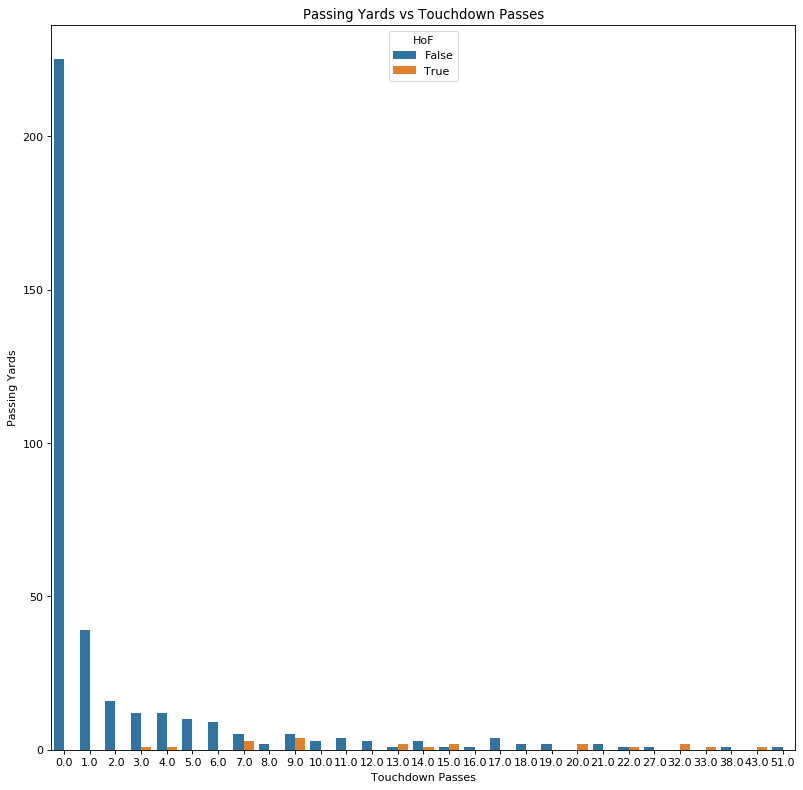

In [38]:
retired = master_data[master_data["Current Status"] == "Retired"].copy()
retired.drop(["Completion Percentage", "Passing Yards Per Attempt", "Fumbles", "Fumbles Lost", "Sacked Yards Lost", "Yards Per Carry"], axis=1, inplace=True)
retired.dropna(inplace=True)

plt.figure(figsize=(12, 12), dpi=80)
# plt.ylim(0, 60000)
# plt.xlim(0, 400)

ax = sns.countplot(x="Rushing TDs", data=retired, hue="HoF")
ax.set(
        xlabel='Touchdown Passes',
        ylabel='Passing Yards',
        title='Passing Yards vs Touchdown Passes')

# Machine Learning

In [39]:
retired = master_data[master_data["Current Status"] == "Retired"].copy()
retired.drop(["Completion Percentage", "Passing Yards Per Attempt", "Fumbles", "Fumbles Lost", "Sacked Yards Lost", "Yards Per Carry"], axis=1, inplace=True)
retired['HoF'] = retired['HoF'].apply(lambda x: 0 if not x else 1)
retired.dropna(inplace=True)
retired.head()

,Player Id,Passes Completed,Passes Attempted,Passing Yards,TD Passes,Ints,Sacks,Rushing Attempts,Rushing Yards,Rushing TDs,HoF,Current Status,GWD,Superbowl Wins
0,"Warner, Kurt",2666.0,4070.0,32344.0,208.0,128.0,260.0,173.0,286.0,3.0,1,Retired,3.0,1.0
1,"Favre, Brett",6300.0,10169.0,71838.0,508.0,336.0,525.0,602.0,1844.0,14.0,1,Retired,2.0,1.0
2,"Stabler, Ken",2270.0,3793.0,27938.0,194.0,222.0,281.0,118.0,93.0,4.0,1,Retired,3.0,1.0
3,"Aikman, Troy",2898.0,4715.0,32942.0,165.0,141.0,259.0,327.0,1016.0,9.0,1,Retired,1.0,3.0
4,"Moon, Warren",3988.0,6823.0,49325.0,291.0,233.0,458.0,543.0,1736.0,22.0,1,Retired,2.0,0.0


In [40]:
X = retired.drop(["Player Id", "Current Status", "HoF"], axis=1)
y = retired['HoF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='auto').fit(X_train, y_train)

In [41]:
test = retired[retired['HoF'] == 1]
test = test.drop(["Player Id", "Current Status", "HoF"], axis=1)
svm_outcome = clf.predict(test)
print('The SVM model was able to guess ' + str(np.mean(svm_outcome)) + '% of the hall of famers correctly')
print('and the set as a whole ' + str(clf.score(X_test, y_test)) + '% correctly')

The SVM model was able to guess 0.5238095238095238% of the hall of famers correctly
and the set as a whole 0.921875% correctly


In [42]:
logistic = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
logistic_outcome = logistic.predict(test)
print('The logistic regression model was able to guess ' + str(np.mean(logistic_outcome)) + '% of the hall of famers correctly')
print('and the set as a whole ' + str(logistic.score(X_test, y_test)) + '% correctly')

The logistic regression model was able to guess 0.5714285714285714% of the hall of famers correctly
and the set as a whole 0.90625% correctly


c:\users\stoney\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [43]:
filtered_data = retired[['HoF', 'Superbowl Wins', 'GWD', 'Rushing TDs']]
filtered_data.head()

,HoF,Superbowl Wins,GWD,Rushing TDs
0,1,1.0,3.0,3.0
1,1,1.0,2.0,14.0
2,1,1.0,3.0,4.0
3,1,3.0,1.0,9.0
4,1,0.0,2.0,22.0


In [44]:
X = filtered_data.drop(["HoF"], axis=1)
y = filtered_data['HoF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='auto').fit(X_train, y_train)

In [45]:
clf.score(X_test, y_test)

0.9375

In [46]:
test = filtered_data[filtered_data['HoF'] == 1]
test = test.drop('HoF', axis=1)
outcome = clf.predict(test)
outcome

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [47]:
np.mean(outcome)

0.5238095238095238

In [48]:
logistic = LogisticRegression().fit(X_train, y_train)

c:\users\stoney\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [49]:
outcome = logistic.predict(test)
outcome

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
      dtype=int64)

In [50]:
np.mean(outcome)

0.6190476190476191

# Test

In [51]:
def clamp(x, min_n, max_n):
    return min(max(x, min_n), max_n)

def qbRating (att, comp, yds,td, inter):
    a = (((comp/att)-0.3) * 5)
    b = (((yds/att)-3) * 0.25)
    c = ((td/att) * 20)
    d = (2.375 - ((inter/att) * 25))   
    
    a = clamp(a, min_n=0, max_n=2.375)
    b = clamp(b, min_n=0, max_n=2.375) 
    c = clamp(c, min_n=0, max_n=2.375)
    d = clamp(d, min_n=0, max_n=2.375)
 
    return round(((a + b + c + d)/6) * 100, 1)

In [58]:
rating = []
retired = master_data[(master_data["Current Status"] == "Retired") & (master_data["Passing Yards"] > 1000)].copy()
for index, row in retired.iterrows():
    rating.append(int(qbRating(row['Passes Attempted'], row['Passes Completed'], row['Passing Yards'], row['TD Passes'], row['Ints'])))

In [59]:
retired['qbr'] = rating
retired['HoF'] = retired['HoF'].apply(lambda x: 0 if not x else 1)
filtered_data = retired[['HoF', 'Superbowl Wins', 'GWD', 'qbr']]
filtered_data.head()

,HoF,Superbowl Wins,GWD,qbr
0,1,1.0,3.0,93
1,1,1.0,2.0,86
2,1,1.0,3.0,75
3,1,3.0,1.0,81
4,1,0.0,2.0,80


In [60]:
X = filtered_data.drop("HoF", axis=1)
y = filtered_data['HoF']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = svm.SVC(gamma='auto').fit(X_train, y_train)

In [61]:
test = filtered_data[filtered_data['HoF'] == 1]
#test.drop('Retired', axis=1, inplace=True)
test = test.drop(["HoF"], axis=1)
svm_outcome = clf.predict(test)
print('The SVM model was able to guess ' + str(np.mean(svm_outcome)) + '% of the hall of famers correctly')
print('and the set as a whole ' + str(clf.score(X_test, y_test)) + '% correctly')

The SVM model was able to guess 0.38095238095238093% of the hall of famers correctly
and the set as a whole 0.8870967741935484% correctly


[Text(0.5, 0, 'Touchdown Passes'),
 Text(0.5, 1.0, 'Passing Yards vs Touchdown Passes')]

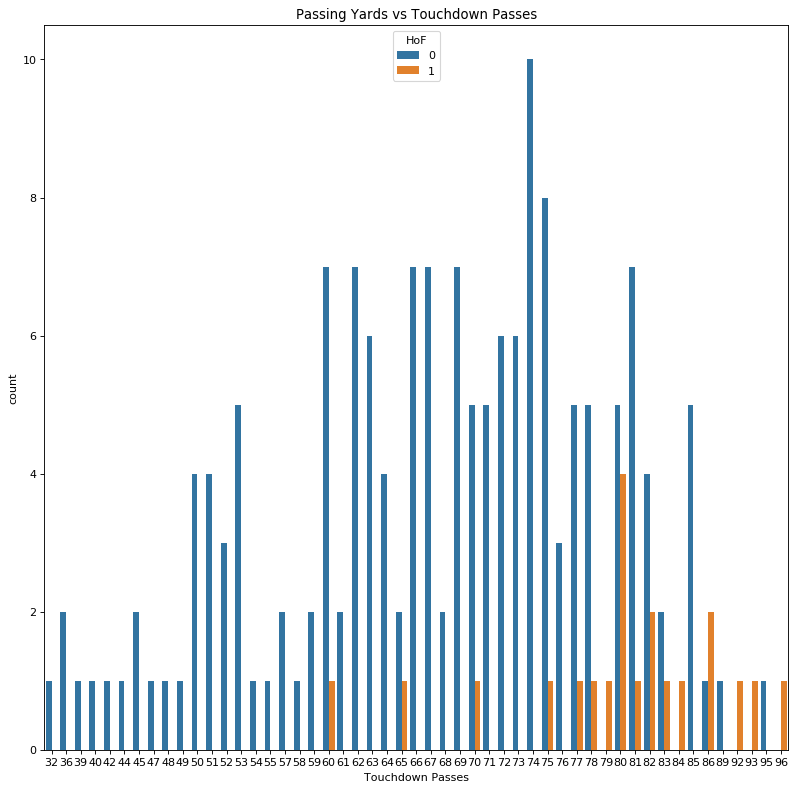

In [62]:
plt.figure(figsize=(12, 12), dpi=80)

ax = sns.countplot(x="qbr", data=retired, hue="HoF")
ax.set(
        xlabel='Touchdown Passes',
        title='Passing Yards vs Touchdown Passes')